<a href="https://colab.research.google.com/github/sujithkumar27/Message-Spam-Detection/blob/main/tsk_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING PYTHON LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATASETS

In [2]:
spam = '/content/drive/MyDrive/Colab Notebooks/spam.csv'

In [4]:
data = pd.read_csv(spam,encoding = 'ISO-8859-1')

In [5]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
data = data.drop(columns=data.columns[2:5])

In [10]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.columns = ['Category', 'Message']

In [13]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [17]:
data['spam'] = np.where(data['Category'] == 'spam', 1, 0)

In [18]:
data

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


DATA VISUALIZATION

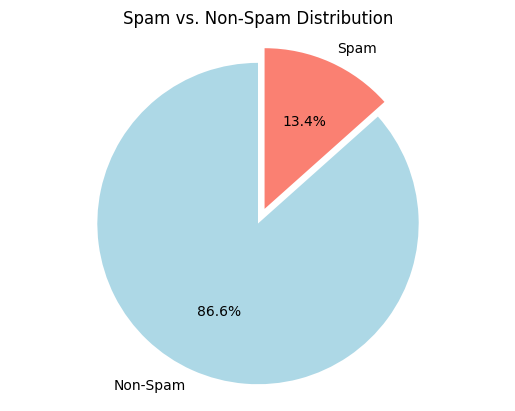

In [21]:
spam_count = data['spam'].value_counts()
labels = ['Non-Spam', 'Spam']
sizes = [spam_count[0], spam_count[1]]
colors = ['lightblue', 'salmon']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Spam vs. Non-Spam Distribution")
plt.axis('equal')
plt.show()

TRAINING AD TESTING DATASETS

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data.Message,data.spam, test_size=0.2)

In [26]:
featurer = CountVectorizer()
X_train_count = featurer.fit_transform(X_train.values)

NAIVE BAYES CLASSIFIER

In [27]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [28]:
X_test_count = featurer.transform(X_test)
model.score(X_test_count, y_test)

0.9865470852017937

In [31]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [57]:
pretrained_model = model

In [51]:
import os
print("Pre-trained model exists:", os.path.isfile('pretrained_model.pkl'))


Pre-trained model exists: False


DEVELOPING A PRE-TRAINED MODEL

In [53]:
data = pd.DataFrame({
    'Text': ["This is spam", "This is not spam", "Buy cheap now", "Hello, how are you?", "Click here to win"],
    'Category': ["spam", "ham", "spam", "ham", "spam"]
})

data['Category'] = data['Category'].apply(lambda x: 1 if x == "spam" else 0)

featurer = CountVectorizer()
X = featurer.fit_transform(data['Text'])
y = data['Category']

model = MultinomialNB()
model.fit(X, y)

with open('pretrained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('featurer.pkl', 'wb') as file:
    pickle.dump(featurer, file)



MODEL TO PREDICT SPAM AND NOT SPAM MESSAGES

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
with open('pretrained_model.pkl', 'rb') as file:
    pretrained_model = pickle.load(file)

with open('featurer.pkl', 'rb') as file:
    featurer = pickle.load(file)

def predict_spam(sentence, model, featurer):
    transformed_sentence = featurer.transform([sentence])
    prediction = model.predict(transformed_sentence)
    return prediction[0]

while True:
    user_input = input("Enter a message to check if it's spam (type 'exit' to quit): ")

    if user_input.lower() == 'exit':
        print("Exiting the program.")
        break

    is_spam = predict_spam(user_input, pretrained_model, featurer)

    if is_spam == 1:
        print(f"'{user_input}' is a spam message.")
    else:
        print(f"'{user_input}' is not a spam message.")

Enter a message to check if it's spam (type 'exit' to quit): Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr...
'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr...' is a spam message.
Enter a message to check if it's spam (type 'exit' to quit): exit
Exiting the program.
